In [ ]:
#Implement a KNN model to classify the animals in to categorie


In [ ]:
# import libraries

In [29]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# reading file

In [30]:
df = pd.read_csv("Zoo (1).csv")

In [31]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [32]:
from sklearn import preprocessing


In [33]:
label_encoder = preprocessing.LabelEncoder()
df['animal name']= label_encoder.fit_transform(df['animal name'])
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
# eda

In [34]:
df.describe()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,49.257426,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,28.968829,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,49.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,74.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   animal name  101 non-null    int32
 1   hair         101 non-null    int64
 2   feathers     101 non-null    int64
 3   eggs         101 non-null    int64
 4   milk         101 non-null    int64
 5   airborne     101 non-null    int64
 6   aquatic      101 non-null    int64
 7   predator     101 non-null    int64
 8   toothed      101 non-null    int64
 9   backbone     101 non-null    int64
 10  breathes     101 non-null    int64
 11  venomous     101 non-null    int64
 12  fins         101 non-null    int64
 13  legs         101 non-null    int64
 14  tail         101 non-null    int64
 15  domestic     101 non-null    int64
 16  catsize      101 non-null    int64
 17  type         101 non-null    int64
dtypes: int32(1), int64(17)
memory usage: 13.9 KB


In [36]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [37]:
df.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,99,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [38]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [39]:
df.type.value_counts()


1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [40]:
#data Visualisation

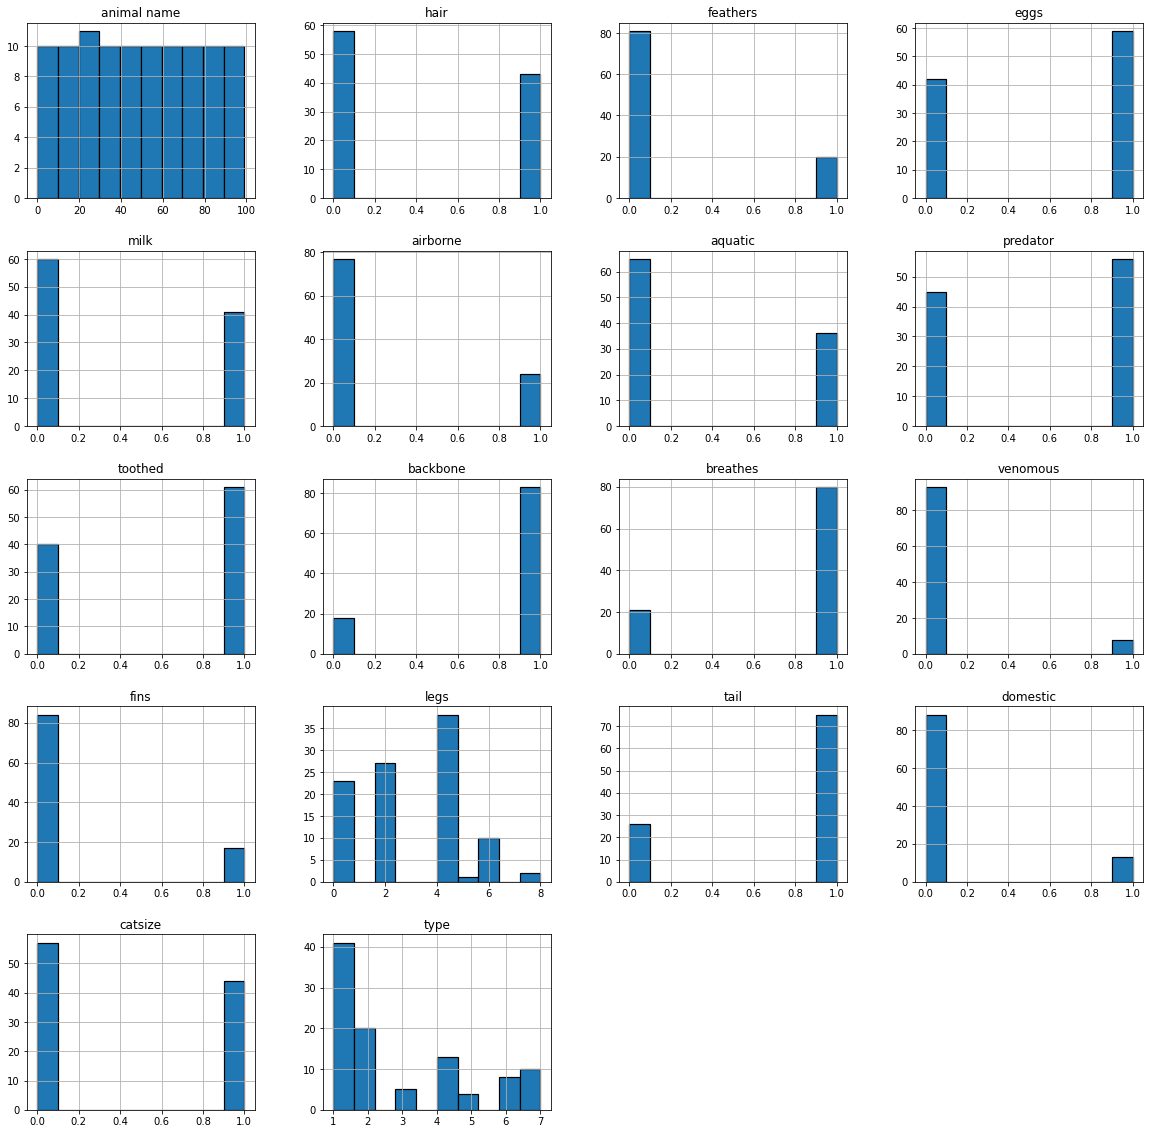

In [41]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<AxesSubplot:>

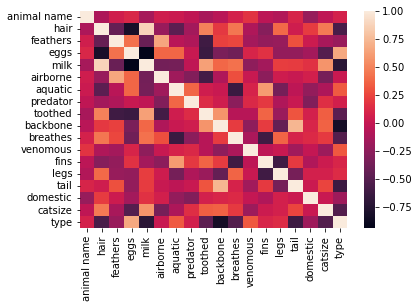

In [42]:
# correlation matrix 
cor = df.corr()
sns.heatmap(cor)

C:\Users\berri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='animal name', ylabel='type'>

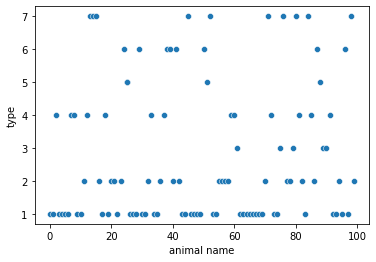

In [46]:
# Scatter plot of two features, and pairwise plot
sns.scatterplot(df['animal name'],df['type'])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
scaler.fit(df.drop('type',axis=1))


StandardScaler()

In [50]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [52]:
#perform transformation
scaled_features = scaler.transform(df.drop('type',axis=1))
scaled_features

array([[-1.70884021,  1.16139451, -0.49690399, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [-1.67414817,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-1.63945614, -0.86103386, -0.49690399, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.65628693,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [ 1.69097896, -0.86103386, -0.49690399, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [ 1.725671  , -0.86103386,  2.01246118, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [53]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,-1.708840,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,-1.674148,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-1.639456,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,-1.604764,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,-1.570072,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


In [54]:
# APPLYING KNN

In [61]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = df.loc[:,df.columns != 'hair'], df.loc[:,'hair']
knn.fit(x,y)
prediction = knn.predict(x)
print("Prediction = ",prediction)

Prediction =  [1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1
 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0]


In [62]:
#Train Test Split


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = df.loc[:,df.columns != 'hair'], df.loc[:,'hair']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=1) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=1) accuracy is:  0.5806451612903226


In [66]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))


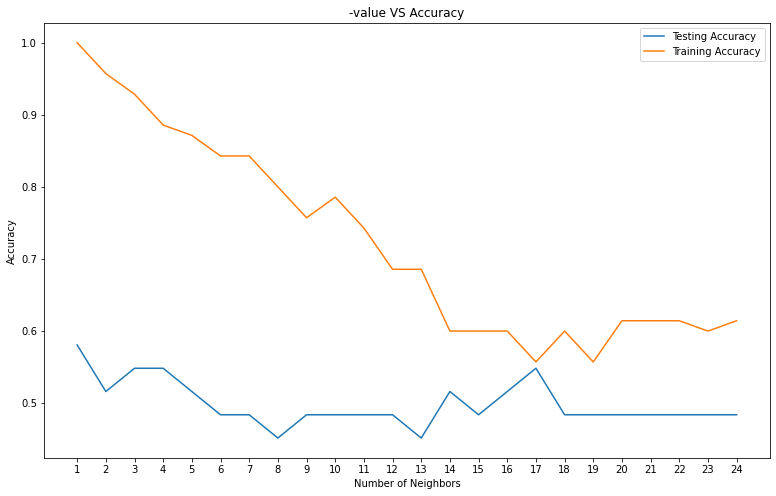

Best accuracy is 0.5806451612903226 with K = 1


In [67]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))
